<a href="https://colab.research.google.com/github/karthikvijayakumar/EVA/blob/vijkar_development/Project%206/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

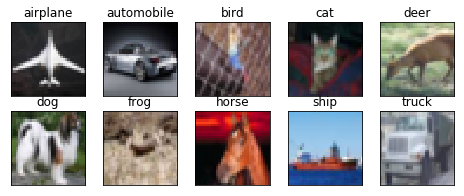

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Given baseline model

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 13s 33ms/step - loss: 1.8466 - acc: 0.2979 - val_loss: 1.4798 - val_acc: 0.4414
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3390 - acc: 0.5171 - val_loss: 1.1163 - val_acc: 0.6005
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1191 - acc: 0.6071 - val_loss: 0.9928 - val_acc: 0.6449
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9709 - acc: 0.6594 - val_loss: 0.8608 - val_acc: 0.7000
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8813 - acc: 0.6929 - val_loss: 0.8094 - val_acc: 0.7231
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8027 - acc: 0.7224 - val_loss: 0.7709 - val_acc: 0.7398
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7464 - acc: 0.7429 - val_loss: 0.7105 - val_acc: 0.7556
Epoch 8/100
390/390 [==============================] - 9s 23m

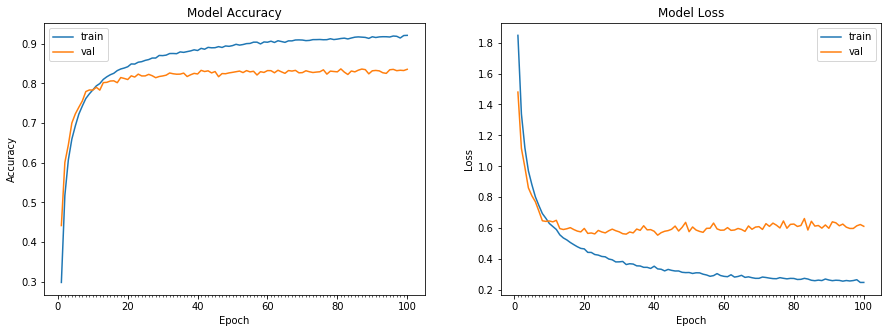

Accuracy on test data is: 83.55


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

The test accuracy observed in the given model is 83.55%

# Improved model

This model removes the dense layers, builds up the recepetive field of the network and follows other concepts mentioned in class.

Shortcomings:
1. Image normalization was left out. I observed I was able to beat the baseline model's accuracy without image normalization and hence left it out.
2. Lesser number of parameters and lesser validation accuracy
<br> The improved model and the given baseline model use about 1 million parameters. With more parameters one the network could have more expressivity and better accuracy. I left at where it is since it met the objectives of the assignment and time constraints.

In [0]:
# Define the model

dropout_rate = 0.15

model_improved = Sequential()

# Convolution block
model_improved.add(Convolution2D(128, (3, 3), input_shape=(32, 32, 3))) # RF: 3x3
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

model_improved.add(Convolution2D(256, (3, 3))) # RF: 5x5
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

# Transition block
model_improved.add(MaxPooling2D(pool_size=(2, 2))) # RF: 10x10
model_improved.add(Dropout(dropout_rate))
model_improved.add(Convolution2D(64, (1, 1))) # RF: 10x10
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

# Convolution block
model_improved.add(Convolution2D(128, (3, 3))) # RF: 12x12
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))
model_improved.add(Convolution2D(256, (3, 3))) # RF: 14x14
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

# Transition block
model_improved.add(MaxPooling2D(pool_size=(2, 2))) # RF: 28x28
model_improved.add(Dropout(dropout_rate))
model_improved.add(Convolution2D(128, (1, 1))) # RF: 28x28
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

# Transition block
model_improved.add(Convolution2D(256, (3, 3))) # RF: 30x30
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))
model_improved.add(Convolution2D(10, (3, 3))) #RF: 32x32
model_improved.add(Activation('relu'))
model_improved.add(BatchNormalization())
model_improved.add(Dropout(dropout_rate))

# Flattenign and output layer
model_improved.add(Flatten())
model_improved.add(Activation('softmax'))


# Compile the model
model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model_improved.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 128)       512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 256)       295168    
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 256)       1024      
__________

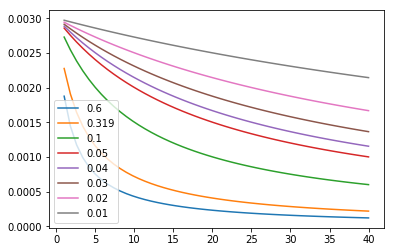

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(1,40)

plt.plot(x, np.round(0.003 * 1/(1 + 0.6 * x), 10), label = '0.6')
plt.plot(x, np.round(0.003 * 1/(1 + 0.319* x), 10), label = '0.319')
plt.plot(x, np.round(0.003 * 1/(1 + 0.1* x), 10), label = '0.1')
plt.plot(x, np.round(0.003 * 1/(1 + 0.05* x), 10), label = '0.05')
plt.plot(x, np.round(0.003 * 1/(1 + 0.04* x), 10), label = '0.04')
plt.plot(x, np.round(0.003 * 1/(1 + 0.03* x), 10), label = '0.03')
plt.plot(x, np.round(0.003 * 1/(1 + 0.02* x), 10), label = '0.02')
plt.plot(x, np.round(0.003 * 1/(1 + 0.01* x), 10), label = '0.01')
plt.legend()

The above is a plot of the learning rate values for different scaling constants. In assignments 4 and 5, I had used 0.1. Here I noticed the validation accuracy was moving quite well even without an LR scheduler, hence wanted the learning rate to decrease relatively slower. After some experimenting with 0.01, 0.03 and 0.05, I went with 0.03

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=40)`


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 41s 106ms/step - loss: 1.5573 - acc: 0.4569 - val_loss: 2.0714 - val_acc: 0.3700

Epoch 00001: val_acc improved from -inf to 0.37000, saving model to weights.model_improved.best.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0029126214.
390/390 [==============================] - 39s 99ms/step - loss: 1.1446 - acc: 0.6036 - val_loss: 1.3172 - val_acc: 0.5631

Epoch 00002: val_acc improved from 0.37000 to 0.56310, saving model to weights.model_improved.best.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028301887.
390/390 [==============================] - 38s 98ms/step - loss: 0.9720 - acc: 0.6600 - val_loss: 0.9294 - val_acc: 0.6806

Epoch 00003: val_acc improved from 0.56310 to 0.68060, saving model to weights.model_improved.best.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rat

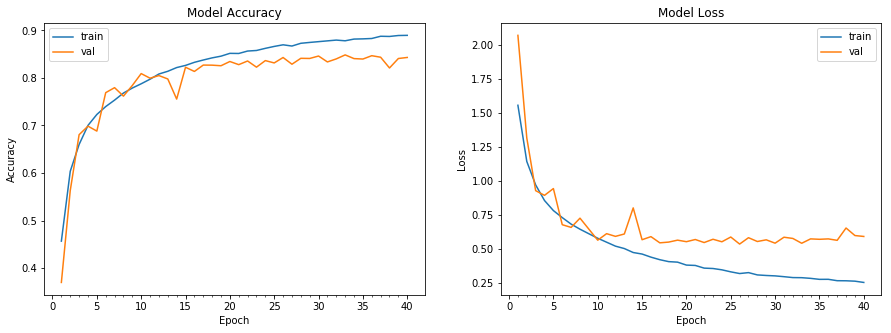

Accuracy on test data is: 84.84


In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.03 * epoch), 10)

filepath="weights.model_improved.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]
# callbacks_list = [checkpoint]

# train the model
start = time.time()
# Train the model
model_improved_info = model_improved.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 validation_data = (test_features, test_labels), callbacks = callbacks_list,
                                 verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_improved_info)

#Load the best model weights according to validation accuracy
model_improved.load_weights("weights.model_improved.best.hdf5")
model_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_improved))

The improved model achieved a validation accuracy of 84.84% which is higher than 83.55% the accuracy reached by the baseline model. Given more epochs one could potentially improve the margin but probably not by much. Stopped at 40 epochs since it met the requirements of the assignment.